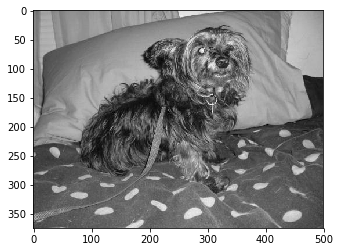

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_dir = "C:/Users/sai45.LAPTOP-OT50J80G/Downloads/PetImages"
categories = ["Dog", "Cat"]

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

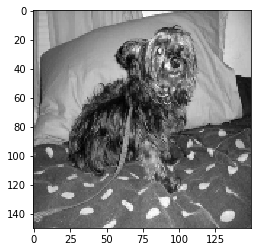

In [23]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [31]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()
                

In [32]:
import random

random.shuffle(training_data)

In [33]:
X = []
y = []

In [35]:
for features, label in training_data:
    X.append(features)
    y.append(label)
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)

[[[[ 66]
   [ 62]
   [ 68]
   ...
   [170]
   [169]
   [173]]

  [[ 71]
   [ 65]
   [ 67]
   ...
   [170]
   [175]
   [167]]

  [[108]
   [ 93]
   [ 69]
   ...
   [164]
   [163]
   [169]]

  ...

  [[208]
   [203]
   [210]
   ...
   [215]
   [224]
   [221]]

  [[208]
   [210]
   [208]
   ...
   [223]
   [224]
   [227]]

  [[208]
   [209]
   [210]
   ...
   [217]
   [220]
   [218]]]]


In [36]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [39]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D

X = X/255.0

In [44]:
model = Sequential()

#First Layer
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Third Layer
model.add(Flatten())
model.add(Dense(64))

#Output Layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.fit(X, y, batch_size=32, epochs = 10, validation_split = 0.15)


Train on 42408 samples, validate on 7484 samples
Epoch 1/10
42408/42408 [==============================] - 172s 4ms/step - loss: 0.5857 - acc: 0.7035 - val_loss: 0.4722 - val_acc: 0.7807
Epoch 2/10
42408/42408 [==============================] - 171s 4ms/step - loss: 0.4136 - acc: 0.8134 - val_loss: 0.3922 - val_acc: 0.8232
Epoch 3/10
42408/42408 [==============================] - 171s 4ms/step - loss: 0.3055 - acc: 0.8708 - val_loss: 0.3062 - val_acc: 0.8681
Epoch 4/10
42408/42408 [==============================] - 170s 4ms/step - loss: 0.2145 - acc: 0.9132 - val_loss: 0.2064 - val_acc: 0.9148
Epoch 5/10
42408/42408 [==============================] - 170s 4ms/step - loss: 0.1514 - acc: 0.9392 - val_loss: 0.2044 - val_acc: 0.9098
Epoch 6/10
42408/42408 [==============================] - 170s 4ms/step - loss: 0.1097 - acc: 0.9590 - val_loss: 0.0918 - val_acc: 0.9649
Epoch 7/10
42408/42408 [==============================] - 171s 4ms/step - loss: 0.0846 - acc: 0.9697 - val_loss: 0.0779 - v